# Trader Performance & Behavioral Adaptation Across Market Sentiment Regimes


In [103]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# loading dataset Fear_greed_index.csv and historical_data.csv
df1 = pd.read_csv("C:/Users/Admin/Documents/training dataset/fear_greed_index (1).csv")
df2 = pd.read_csv("C:/Users/Admin/Documents/training dataset/historical_data.csv")

In [4]:
print(df1.shape)
print(df2.shape)

(2644, 4)
(211224, 16)


In [5]:
print(df1.dtypes)
print("\n",df2.dtypes)

timestamp          int64
value              int64
classification    object
date              object
dtype: object

 Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [6]:
print(df1.isna().sum())
print("\n")
print(df2.isna().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [7]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
df1.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [10]:
df2.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [11]:
df1['date'] = pd.to_datetime(df1['date'])

In [12]:
df2['date'] = pd.to_datetime(df2['Timestamp IST'],format='mixed',dayfirst=True)

In [13]:
df2['date'] = df2['date'].dt.date

In [14]:
df2.date = pd.to_datetime(df2.date)

In [15]:
df1.dtypes

timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

In [16]:
df2.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST               object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
date                datetime64[ns]
dtype: object

In [17]:
df2.date.head()

0   2024-12-02
1   2024-12-02
2   2024-12-02
3   2024-12-02
4   2024-12-02
Name: date, dtype: datetime64[ns]

In [20]:
merged_df = df2.merge(df1,on='date')

In [21]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


## Aggregated to Account - day level 

In [23]:
# lets create a daily df to analyse daily level activities
daily_df = merged_df.groupby(['Account','date','classification']).agg({'Closed PnL' : "sum",'Trade ID':'count','Size USD':['mean','sum'],'Fee':'sum'}).reset_index()

In [24]:
# lets rename the columns as - 
daily_df.columns = ['account','date','classification','daily_pnl','num_trades','avg_size_usd','total_volume','total_fee']

In [25]:
daily_df.head()

,account,date,classification,daily_pnl,num_trades,avg_size_usd,total_volume,total_fee
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,900880.13,167.796055
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,542413.18,67.883615
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,949380.00,94.937983
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,338240.00,33.823995
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,465700.00,104.622490


In [26]:
# lets declare the win day column as (0,1) when daily_pnl is greater than 0 then assign 1 else 0
daily_df['win_day'] = (daily_df['daily_pnl'] > 0).astype(int)

In [27]:
long_short = merged_df.groupby(['Account','date','Side']).size().unstack(fill_value=0).reset_index()

In [28]:
# rename the columns BUY and SELL as long_count and short_count
long_short.rename(columns={'BUY' : 'long_count','SELL':'short_count'},inplace=True)

In [29]:
long_short.head()

Side,Account,date,long_count,short_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12,0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,12,15


In [30]:
# merging the daily_df with long_short
daily_df = daily_df.merge(long_short,
                         left_on=['account','date'],
                         right_on=['Account','date'], 
                         how='left')

In [31]:
daily_df.head()

,account,date,classification,daily_pnl,num_trades,avg_size_usd,total_volume,total_fee,win_day,Account,long_count,short_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,900880.13,167.796055,0,0x083384f897ee0f19899168e3b1bec365f52a9012,0,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,542413.18,67.883615,0,0x083384f897ee0f19899168e3b1bec365f52a9012,0,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,949380.00,94.937983,0,0x083384f897ee0f19899168e3b1bec365f52a9012,0,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,338240.00,33.823995,0,0x083384f897ee0f19899168e3b1bec365f52a9012,12,0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,465700.00,104.622490,1,0x083384f897ee0f19899168e3b1bec365f52a9012,12,15


In [32]:
daily_df.drop(columns=['Account'],inplace=True,axis=1)

In [52]:
# calculating long ratio and short ratio 
daily_df['long_ratio'] = daily_df['long_count'] / daily_df['num_trades']
daily_df['short_ratio'] = daily_df['short_count'] / daily_df['num_trades']

In [33]:
print(daily_df.shape) 
print(daily_df.date.nunique())
print(daily_df.account.nunique())


(2340, 11)
479
32


In [34]:
daily_df.head()

,account,date,classification,daily_pnl,num_trades,avg_size_usd,total_volume,total_fee,win_day,long_count,short_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,900880.13,167.796055,0,0,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,542413.18,67.883615,0,0,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,949380.00,94.937983,0,0,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,338240.00,33.823995,0,12,0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,465700.00,104.622490,1,12,15


In [35]:
# check how spread the value count is for classication
daily_df.classification.value_counts()

classification
Greed            648
Fear             630
Extreme Greed    526
Neutral          376
Extreme Fear     160
Name: count, dtype: int64

In [36]:
# evaluating daily pnl for classification (mean,median)
stats = daily_df.groupby('classification')['daily_pnl'].agg(['mean','median'])

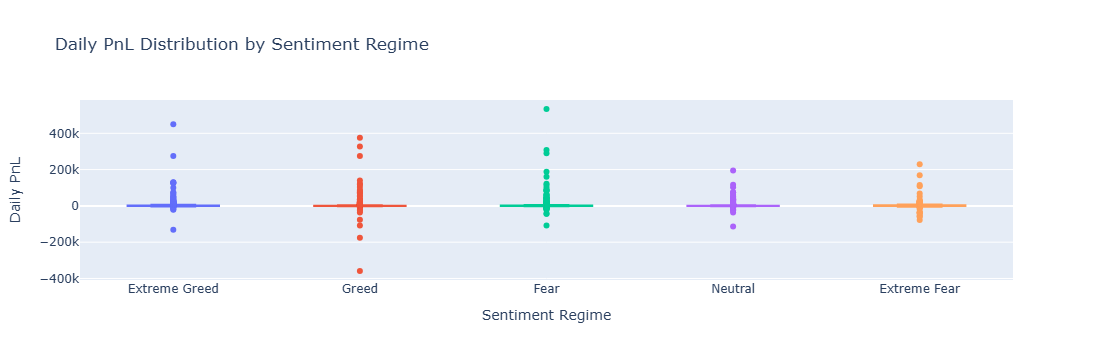

In [39]:
fig = px.box(
    daily_df,
    x="classification",
    y="daily_pnl",
    color="classification",
    title="Daily PnL Distribution by Sentiment Regime"
)
fig.update_layout(
    xaxis_title="Sentiment Regime",
    yaxis_title="Daily PnL",
    showlegend=False
)
fig.show()

In [105]:
fig.write_html("Daily_PnL_Distribution_by_Sentiment_Regime.html")

## Note :- 
    "Performance differs significantly across sentiment regimes.
    Greed regimes exhibit higher average returns but also greater dispersion.
    Neutral regime shows strongest win consistency.
    Fear regime reduces reliability of profitable days."

In [42]:
# calculating the win percentage per classification
win_rate = daily_df.groupby('classification')['win_day'].mean().reset_index()

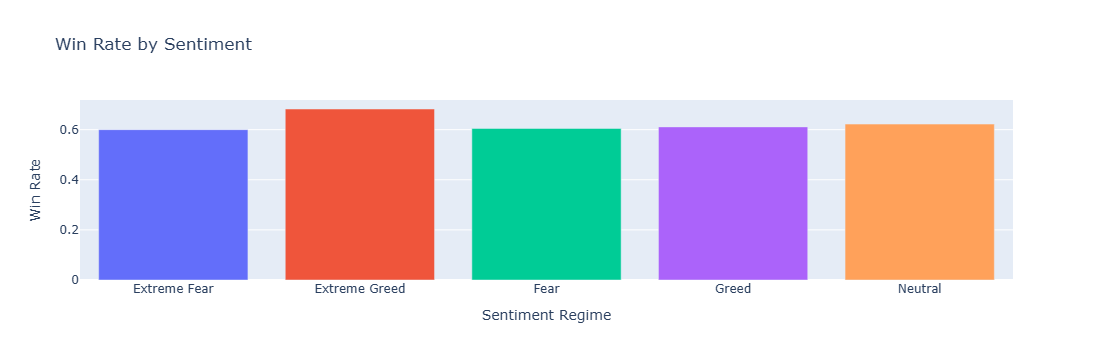

In [43]:
fig = px.bar(
    win_rate,
    x="classification",
    y="win_day",
    color="classification",
    title="Win Rate by Sentiment"
)
fig.update_layout(
    yaxis_title="Win Rate",
    xaxis_title="Sentiment Regime",
    showlegend=False
)
fig.show()

In [106]:
fig.write_html("Win_Rate_by_Sentiment.html")

## Note :- 
    "Neutral regime produces the highest probability of profitable trading days.
     Fear regime has the lowest win rate, indicating reduced edge in bearish sentiment."

In [44]:
stats = daily_df.groupby("classification")["daily_pnl"].agg(["mean","median"]).reset_index()

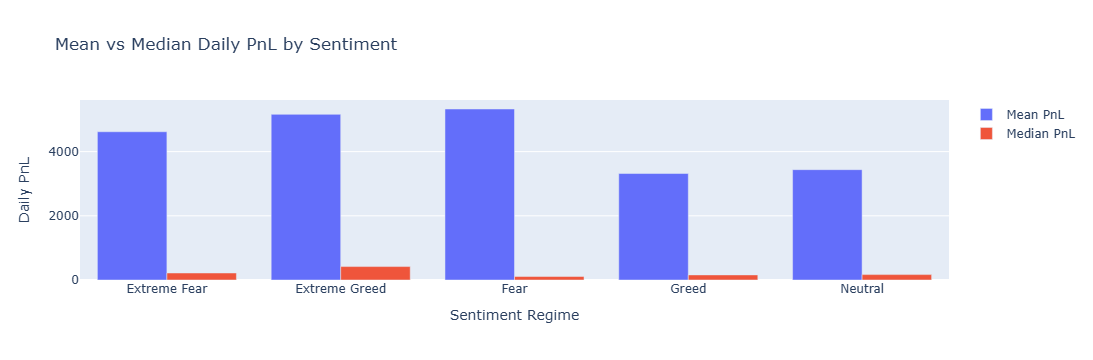

In [45]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=stats["classification"],
    y=stats["mean"],
    name="Mean PnL"
))

fig.add_trace(go.Bar(
    x=stats["classification"],
    y=stats["median"],
    name="Median PnL"
))

fig.update_layout(
    barmode="group",
    title="Mean vs Median Daily PnL by Sentiment",
    xaxis_title="Sentiment Regime",
    yaxis_title="Daily PnL"
)

fig.show()

In [107]:
fig.write_html("Mean_vs_Median_Daily_PnL_by_Sentiment.html")

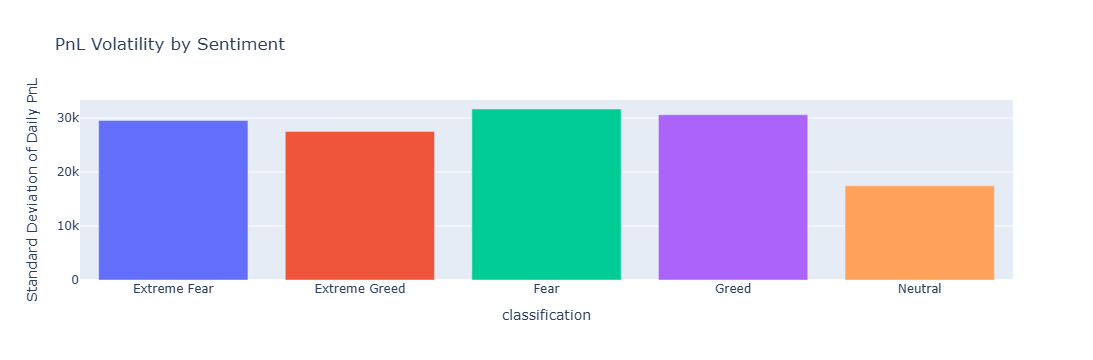

In [83]:
volatility = daily_df.groupby("classification")["daily_pnl"].std().reset_index()

fig = px.bar(
    volatility,
    x="classification",
    y="daily_pnl",
    color="classification",
    title="PnL Volatility by Sentiment"
)

fig.update_layout(
    yaxis_title="Standard Deviation of Daily PnL",
    showlegend=False
)

fig.show()

In [108]:
fig.write_html("PnL_Volatility_by_Sentiment.html")

In [46]:
size_avg = daily_df.groupby("classification")["avg_size_usd"].mean().reset_index()

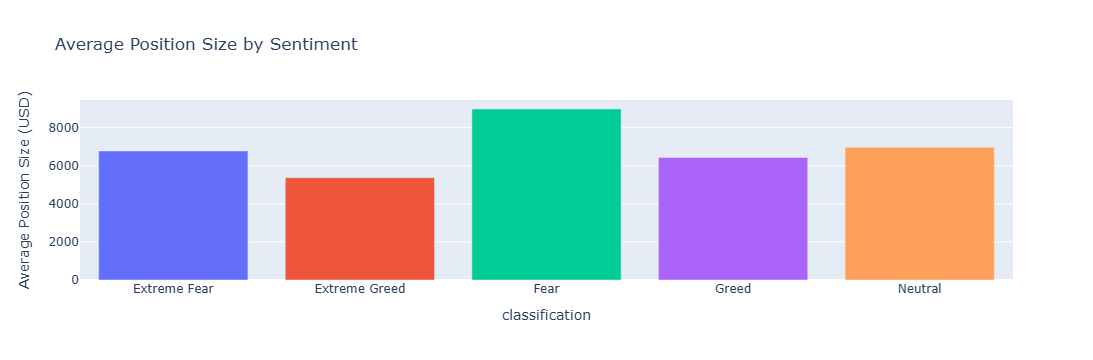

In [47]:
fig = px.bar(
    size_avg,
    x="classification",
    y="avg_size_usd",
    color="classification",
    title="Average Position Size by Sentiment"
)

fig.update_layout(
    yaxis_title="Average Position Size (USD)",
    showlegend=False
)

fig.show()

In [109]:
fig.write_html("Average_Position_Size_by_Sentiment.html")

In [48]:
freq_avg = daily_df.groupby("classification")["num_trades"].mean().reset_index()

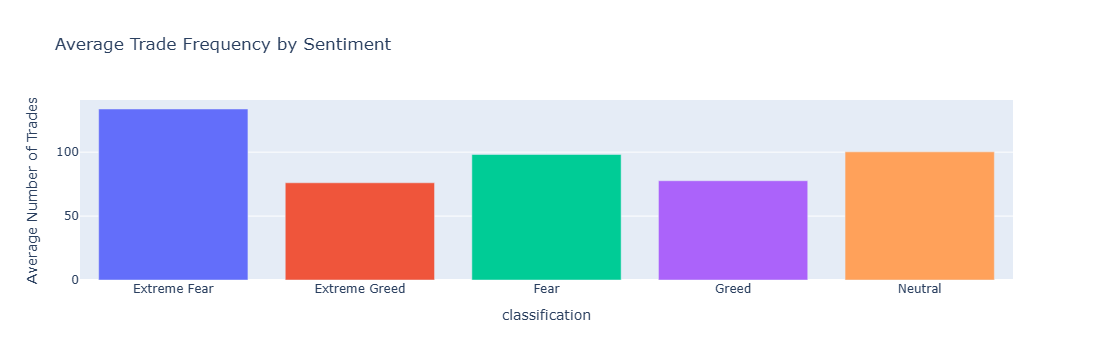

In [49]:
fig = px.bar(
    freq_avg,
    x="classification",
    y="num_trades",
    color="classification",
    title="Average Trade Frequency by Sentiment"
)
fig.update_layout(
    yaxis_title="Average Number of Trades",
    showlegend=False
)
fig.show()

In [110]:
fig.write_html("Average_Trade_Frequency_by_Sentiment.html")

In [89]:
wins = daily_df[daily_df["daily_pnl"] > 0]
losses = daily_df[daily_df["daily_pnl"] < 0]

avg_win = wins.groupby("classification")["daily_pnl"].mean()
avg_loss = losses.groupby("classification")["daily_pnl"].mean()

payoff = (avg_win / abs(avg_loss)).reset_index()
payoff.columns = ["classification", "payoff_ratio"]
payoff

,classification,payoff_ratio
0,Extreme Fear,0.818519
1,Extreme Greed,1.340949
2,Fear,1.619287
3,Greed,0.459139
4,Neutral,0.982649


In [78]:
# evaluating num of trades, average size usd , total size usd and long ratio per classification 
daily_df.groupby('classification')[['num_trades','avg_size_usd','total_volume','long_ratio']].mean()

,num_trades,avg_size_usd,total_volume,long_ratio
classification,,,,
Extreme Fear,133.750000,6773.464125,715526.634000,0.531533
Extreme Greed,76.030418,5371.637182,236625.788156,0.473116
Fear,98.153968,8975.928546,767182.206016,0.518967
Greed,77.628086,6427.866594,445343.356049,0.471594
Neutral,100.228723,6963.694861,479367.189043,0.472431


## Note:- 
    "Traders exhibit contrarian positioning during extreme bearish sentiment."

In [54]:
daily_df[['num_trades','avg_size_usd','long_ratio','win_day']].corr()

,num_trades,avg_size_usd,long_ratio,win_day
num_trades,1.000000,-0.026305,-0.003168,0.130051
avg_size_usd,-0.026305,1.000000,0.020380,-0.002232
long_ratio,-0.003168,0.020380,1.000000,-0.080230
win_day,0.130051,-0.002232,-0.080230,1.000000


## Note:-
    "Profitability appears more strongly associated with trading intensity than with directional bias alone."

In [85]:
summary = daily_df.groupby("classification").agg(
    mean_pnl=("daily_pnl","mean"),
    win_rate=("win_day","mean"),
    volatility=("daily_pnl","std"),
    avg_size=("avg_size_usd","mean")
).reset_index()

summary

,classification,mean_pnl,win_rate,volatility,avg_size
0,Extreme Fear,4619.439053,0.600000,29534.839183,6773.464125
1,Extreme Greed,5161.922644,0.682510,27496.863832,5371.637182
2,Fear,5328.818161,0.604762,31659.771538,8975.928546
3,Greed,3318.100730,0.611111,30599.040173,6427.866594
4,Neutral,3438.618818,0.622340,17447.863645,6963.694861


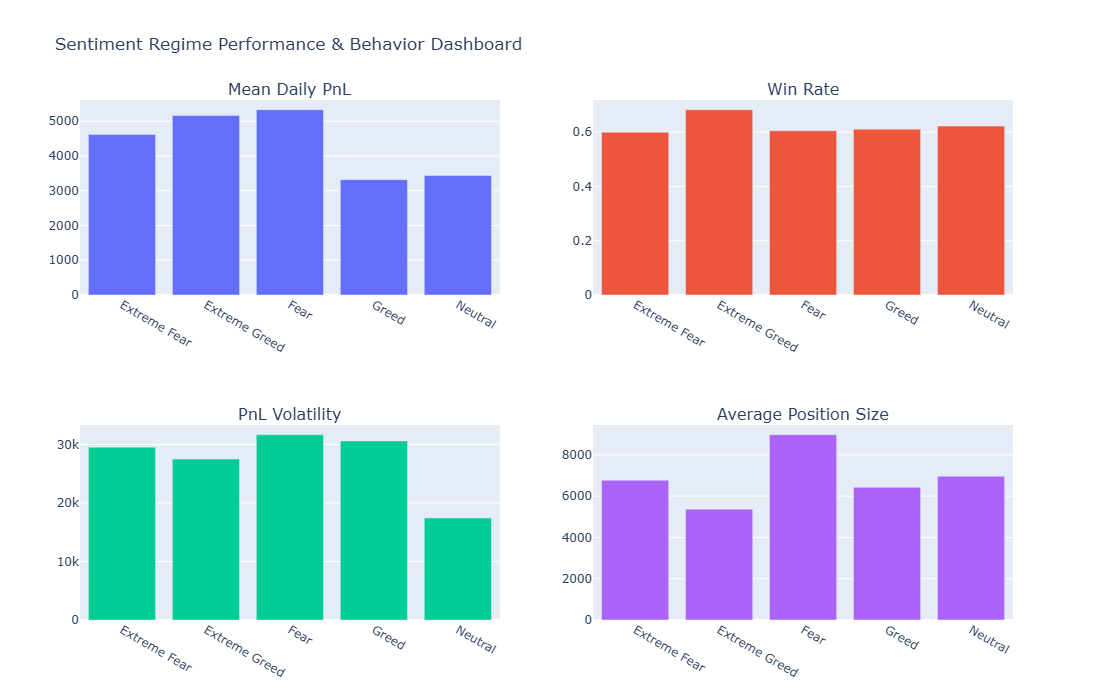

In [86]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Mean Daily PnL",
        "Win Rate",
        "PnL Volatility",
        "Average Position Size"
    )
)

# Mean PnL
fig.add_trace(
    go.Bar(x=summary["classification"], y=summary["mean_pnl"]),
    row=1, col=1
)

# Win Rate
fig.add_trace(
    go.Bar(x=summary["classification"], y=summary["win_rate"]),
    row=1, col=2
)

# Volatility
fig.add_trace(
    go.Bar(x=summary["classification"], y=summary["volatility"]),
    row=2, col=1
)

# Avg Position Size
fig.add_trace(
    go.Bar(x=summary["classification"], y=summary["avg_size"]),
    row=2, col=2
)

fig.update_layout(
    height=700,
    width=1000,
    title_text="Sentiment Regime Performance & Behavior Dashboard",
    showlegend=False
)

fig.show()

In [111]:
fig.write_html("Sentiment_Regime_Performance_&_Behavior_Dashboard.html")

In [88]:
summary["risk_adjusted_return"] = summary["mean_pnl"] / summary["volatility"]
summary

,classification,mean_pnl,win_rate,volatility,avg_size,risk_adjusted_return
0,Extreme Fear,4619.439053,0.600000,29534.839183,6773.464125,0.156406
1,Extreme Greed,5161.922644,0.682510,27496.863832,5371.637182,0.187728
2,Fear,5328.818161,0.604762,31659.771538,8975.928546,0.168315
3,Greed,3318.100730,0.611111,30599.040173,6427.866594,0.108438
4,Neutral,3438.618818,0.622340,17447.863645,6963.694861,0.197080


In [90]:
final_metrics = summary.merge(payoff, on="classification")
final_metrics

,classification,mean_pnl,win_rate,volatility,avg_size,risk_adjusted_return,payoff_ratio
0,Extreme Fear,4619.439053,0.600000,29534.839183,6773.464125,0.156406,0.818519
1,Extreme Greed,5161.922644,0.682510,27496.863832,5371.637182,0.187728,1.340949
2,Fear,5328.818161,0.604762,31659.771538,8975.928546,0.168315,1.619287
3,Greed,3318.100730,0.611111,30599.040173,6427.866594,0.108438,0.459139
4,Neutral,3438.618818,0.622340,17447.863645,6963.694861,0.197080,0.982649


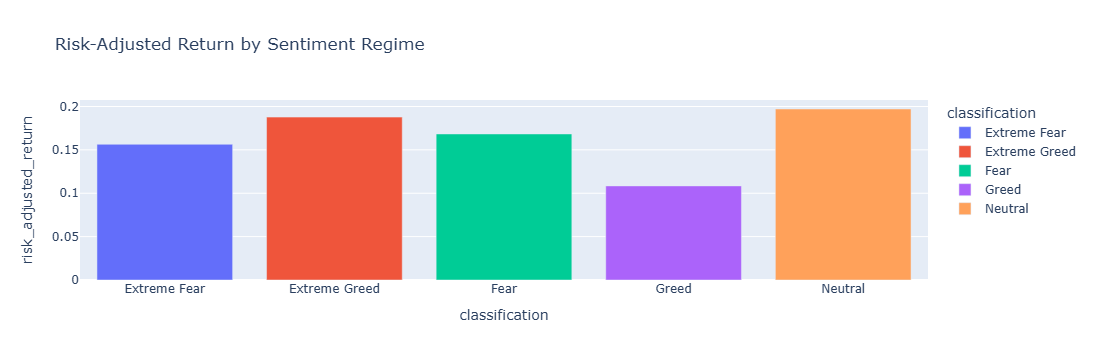

In [91]:
fig = px.bar(
    final_metrics,
    x="classification",
    y="risk_adjusted_return",
    color="classification",
    title="Risk-Adjusted Return by Sentiment Regime"
)

fig.show()

In [112]:
fig.write_html("Risk-Adjusted_Return_by_Sentiment_Regime.html")

## Insights :- 
    1.Neutral regime delivers the highest risk-adjusted return (0.197) due to significantly lower volatility, making it the most capital-efficient environment.

    2. Extreme Greed offers the best combination of win probability (68%) and payoff quality, ranking second in risk-adjusted efficiency.

    3. Fear regime generates the highest raw returns and strongest payoff asymmetry but suffers from elevated volatility, reducing capital efficiency.

    4. Standard Greed is the weakest regime across mean return, payoff ratio, and risk-adjusted performance.

    5. Traders increase position sizing most aggressively during Fear, contributing to amplified volatility and dispersion.

## lets analyze stats per account

In [55]:
# lets analyze stats per account 
account_stats = daily_df.groupby('account').agg({
    'num_trades' : 'mean',
    'daily_pnl' : 'mean', 
    'win_day' : 'mean', 
    'total_volume' : 'mean'
}).reset_index()

In [87]:
account_stats.head()

,account,num_trades,daily_pnl,win_day,total_volume,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,66676.242499,0.666667,2.570719e+06,High activity
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,920.871548,0.557692,2.314517e+05,High activity
2,0x271b280974205ca63b716753467d5a371de622ab,317.416667,-5869.682610,0.666667,2.822787e+06,High activity
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,817.684040,0.888889,4.171001e+04,High activity
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,2444.318913,0.782609,1.473461e+05,Low Activity


In [57]:
# classify activity segment as high or low based on num of trades

median_trades = account_stats['num_trades'].median()

account_stats['activity_segment'] = account_stats['num_trades'].apply(lambda x: 'High activity' if x > median_trades else 'Low Activity')

In [58]:
account_stats.activity_segment.value_counts()

activity_segment
High activity    16
Low Activity     16
Name: count, dtype: int64

In [59]:
# merging daily df with aaccount_stats

daily_df = daily_df.merge(account_stats[['account','activity_segment']],on='account',how='left')

In [60]:
daily_df.head()

,account,date,classification,daily_pnl,num_trades,avg_size_usd,total_volume,total_fee,win_day,long_count,short_count,long_ratio,short_ratio,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,900880.13,167.796055,0,0,177,0.000000,1.000000,High activity
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,542413.18,67.883615,0,0,68,0.000000,1.000000,High activity
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,949380.00,94.937983,0,0,40,0.000000,1.000000,High activity
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,338240.00,33.823995,0,12,0,1.000000,0.000000,High activity
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,465700.00,104.622490,1,12,15,0.444444,0.555556,High activity


In [80]:
daily_df.groupby('activity_segment')['classification'].value_counts()

activity_segment  classification
High activity     Fear              302
                  Greed             251
                  Extreme Greed     230
                  Neutral           166
                  Extreme Fear       85
Low Activity      Greed             397
                  Fear              328
                  Extreme Greed     296
                  Neutral           210
                  Extreme Fear       75
Name: count, dtype: int64

In [62]:
# change the datatype of account column in both the dataframes 

daily_df['account'] =daily_df['account'].astype(str)
account_stats['account'] = account_stats['account'].astype(str)                                   

In [63]:
daily_df.head()

,account,date,classification,daily_pnl,num_trades,avg_size_usd,total_volume,total_fee,win_day,long_count,short_count,long_ratio,short_ratio,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,900880.13,167.796055,0,0,177,0.000000,1.000000,High activity
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,542413.18,67.883615,0,0,68,0.000000,1.000000,High activity
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,949380.00,94.937983,0,0,40,0.000000,1.000000,High activity
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,338240.00,33.823995,0,12,0,1.000000,0.000000,High activity
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,465700.00,104.622490,1,12,15,0.444444,0.555556,High activity


In [64]:
daily_df.columns

Index(['account', 'date', 'classification', 'daily_pnl', 'num_trades',
       'avg_size_usd', 'total_volume', 'total_fee', 'win_day', 'long_count',
       'short_count', 'long_ratio', 'short_ratio', 'activity_segment'],
      dtype='object')

In [65]:
account_stats.head()

,account,num_trades,daily_pnl,win_day,total_volume,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,66676.242499,0.666667,2.570719e+06,High activity
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,920.871548,0.557692,2.314517e+05,High activity
2,0x271b280974205ca63b716753467d5a371de622ab,317.416667,-5869.682610,0.666667,2.822787e+06,High activity
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,817.684040,0.888889,4.171001e+04,High activity
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,2444.318913,0.782609,1.473461e+05,Low Activity


In [76]:
segment_perf = daily_df.groupby(['activity_segment','classification'])['daily_pnl'].mean().unstack()

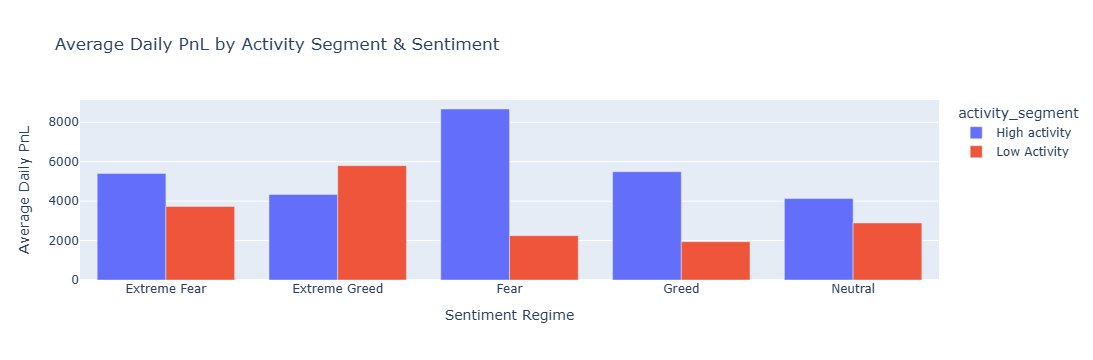

In [77]:
segment_perf = daily_df.groupby(['activity_segment','classification'])['daily_pnl'].mean().reset_index()
fig = px.bar(
    segment_perf,
    x="classification",
    y="daily_pnl",
    color="activity_segment",
    barmode="group",
    title="Average Daily PnL by Activity Segment & Sentiment"
)

fig.update_layout(
    yaxis_title="Average Daily PnL",
    xaxis_title="Sentiment Regime"
)

fig.show()

In [113]:
fig.write_html("Average_Daily_PnL_by_Activity_Segment_&_Sentiment.html")

In [82]:
daily_df.groupby(['account','classification'])[['num_trades','win_day','daily_pnl']].mean().sort_values(by=['num_trades','daily_pnl'],ascending=False)

num_trades  \
account                                    classification                
0xbaaaf6571ab7d571043ff1e313a9609a10637864 Neutral         1067.500000   
0x271b280974205ca63b716753467d5a371de622ab Extreme Fear     797.000000   
0xbaaaf6571ab7d571043ff1e313a9609a10637864 Fear             777.312500   
                                           Extreme Fear     746.666667   
0x513b8629fe877bb581bf244e326a047b249c4ff1 Greed            528.166667   
...                                                                ...   
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0 Extreme Fear       2.500000   
                                           Neutral            2.000000   
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb Greed              1.666667   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6 Neutral            1.000000   
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f Extreme Greed      1.000000   

                                                            win_day  \
account                                    classification             
0xbaaaf6571ab7d571043ff1e313a9609a10637864 Neutral         1.000000   
0x271b280974205ca63b716753467d5a371de622ab Extreme Fear    1.000000   
0xbaaaf6571ab7d571043ff1e313a9609a10637864 Fear            0.750000   
                                           Extreme Fear    0.833333   
0x513b8629fe877bb581bf244e326a047b249c4ff1 Greed           0.666667   
...                                                             ...   
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0 Extreme Fear    0.000000   
                                           Neutral         0.000000   
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb Greed           0.666667   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6 Neutral         0.500000   
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f Extreme Greed   0.333333   

                                                              daily_pnl  
account                                    classification                
0xbaaaf6571ab7d571043ff1e313a9609a10637864 Neutral         14342.195031  
0x271b280974205ca63b716753467d5a371de622ab Extreme Fear    16706.884912  
0xbaaaf6571ab7d571043ff1e313a9609a10637864 Fear            38804.523490  
                                           Extreme Fear    43652.996299  
0x513b8629fe877bb581bf244e326a047b249c4ff1 Greed           27174.610824  
...                                                                 ...  
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0 Extreme Fear     -480.524253  
                                           Neutral           -26.815677  
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb Greed              14.400167  
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6 Neutral          4009.581548  
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f Extreme Greed     420.277529  

[156 rows x 3 columns]

## Note:- 
    "While sentiment affects volatility and return dispersion, trader profitability is more strongly influenced by adaptive behavior — specifically   dynamic scaling of trade frequency and position size across regimes."

# FINAL STRATEGY SECTION

### 1. "Increase trade frequency in Neutral regimes while maintaining controlled position sizes."

### 2. "Scale position size in Greed regimes but apply volatility-based caps."

### 3. "Reduce leverage exposure during Extreme Greed due to high dispersion risk."

### 4. "Adopt dynamic participation rather than fixed daily trading intensity."